In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics,tree
import pydotplus
from sklearn.datasets import load_iris
import collections

In [2]:
df=pd.read_csv("ANZ.csv")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [4]:
salaries=[]
for id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[id]["amount"]))
df["annual salaries"]=salaries

In [19]:
data_feature_names=["card_present_flag","merchant_code","balance","age","amount"]
df_cus = df.groupby("customer_id").mean()
df_cus.head()

,card_present_flag,merchant_code,balance,age,amount,annual salaries
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


In [6]:
# linear regression
N_train = int(len(df_cus)*0.8)
X_train = df_cus.drop("annual salaries", axis=1).iloc[:N_train]
Y_train = df_cus["annual salaries"].iloc[:N_train]
X_test = df_cus.drop("annual salaries", axis=1).iloc[N_train:]
Y_test = df_cus["annual salaries"].iloc[N_train:]

In [7]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
lr.score(X_test,Y_test)

-0.3169423498074737

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred)) 
print('Root of Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))  

Mean Absolute Error: 1270.0766577119025
Mean Squared Error: 2711559.855803576
Root of Mean Squared Error: 1646.6814676201273


Text(0, 0.5, 'Predicted')

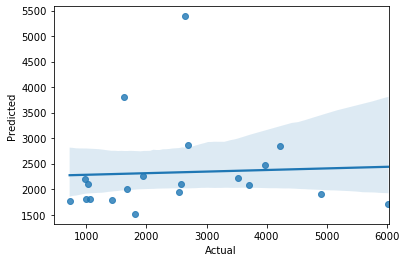

In [9]:
sns.regplot(x=Y_test,y=Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [10]:
# decision tree
dr=DecisionTreeRegressor()
dr.fit(X_train,Y_train)
Y_pred_dr=dr.predict(X_test)
dr.score(X_test,Y_test)

-1.497522027201955

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_dr)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_dr)) 
print('Root of Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_dr)))  

Mean Absolute Error: 1693.4
Mean Squared Error: 5142351.5
Root of Mean Squared Error: 2267.675351543955


Text(0, 0.5, 'Predicted')

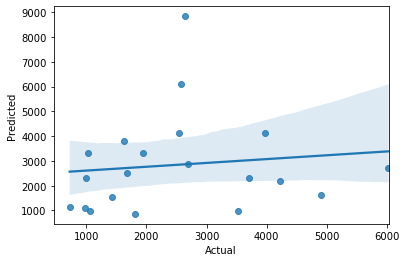

In [12]:
sns.regplot(x=Y_test,y=Y_pred_dr)
plt.xlabel("Actual")
plt.ylabel("Predicted")